## Exercise Description:

Perform classification for the entire MNIST dataset based on the algorithms introduced: Use LDA for dimensionality reduction to 2 or 9 dimensions, classify the dimension-reduced data and compare this classification performance with that of using PCA


In [ ]:
import numpy as np
from scipy.io import loadmat
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn import svm
import time


from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Exercise 7: Support Vector Machine (SVM)

Perform classification for the entire MNIST dataset by using SVMs, e.g. functions in Scikit-learn or Matlab.


## Load data training and testing data


In [ ]:
def create_complete_datasets(data_dict):
    '''
    Function for creating complete training and test sets containing
    all classes.
    '''
    #Empty list
    trainset = []
    traintargets =[]
    testset = []
    testtargets =[]
    
    #For each class
    for i in range(10):
        trainset.append(data_dict["train%d"%i])
        traintargets.append(np.full(len(data_dict["train%d"%i]),i))
        testset.append(data_dict["test%d"%i])
        testtargets.append(np.full(len(data_dict["test%d"%i]),i))
    
    #Concatenate into to complete datasets
    trainset = np.concatenate(trainset)
    traintargets = np.concatenate(traintargets)
    testset = np.concatenate(testset)
    testtargets = np.concatenate(testtargets)
    return trainset, traintargets, testset, testtargets

# Data path
data_path = "../Data/"
file = data_path+"mnist_all.mat"
data = loadmat(file)

#Complete training and test sets
train_set, train_targets, test_set, test_targets = create_complete_datasets(data)

# Scale the data
train_set = StandardScaler().fit_transform(train_set)
test_set = StandardScaler().fit_transform(test_set)

print(f"train_set: \n{train_set}, shape: {train_set.shape}")
print(f"train_targets: \n{train_targets}, shape: {train_targets.shape}")
print(f"test_set: \n{test_set}, shape: {test_set.shape}")
print(f"test_targets: \n{test_targets}, shape: {test_targets.shape}")

## Create and fit SVM on training data


In [32]:
# Use sklearn to fit data
clf_svm = svm.SVC()
clf_svm.fit(train_set,train_targets)

# Choose n components
n_components = 9

# PCA
pca = PCA(n_components=n_components)
pca_transform_train = pca.fit_transform(train_set)
pca_transform_test = pca.transform(test_set)
svm_pca = svm.SVC()
svm_pca.fit(pca_transform_train,train_targets)

# LDA
lda = LDA(n_components=n_components)
lda_transform_train = lda.fit_transform(train_set,train_targets)
lda_transform_test = lda.transform(test_set)
svm_lda = svm.SVC()
svm_lda.fit(lda_transform_train,train_targets)


SVC()

## Test model on test set


In [35]:
# What is the accuracy on the test set?
predict_svm = clf_svm.predict(test_set)
accuracy_svm = accuracy_score(test_targets,predict_svm)
score_svm = clf_svm.score(test_set,test_targets)

Accuracy: 0.9656%


In [39]:
print(f"Prediction: {predict_svm}")
print(f"Accuracy: {accuracy_svm:.2f}%")
print(f"Score: {score_svm:.2f}%")

Prediction: [0 0 0 ... 9 9 9]
Accuracy: 0.97%
Score: 0.97%


## Plot Confusion matrix


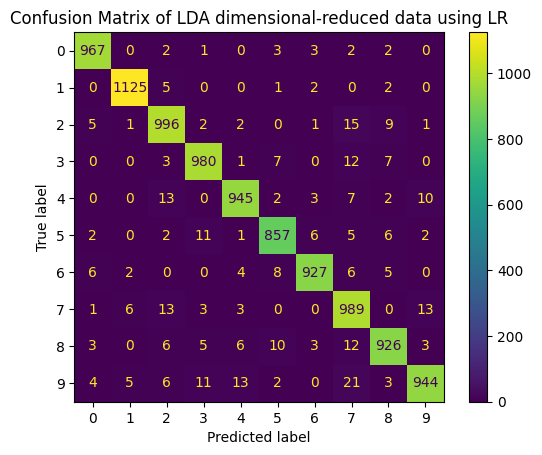

In [41]:
# Does the confusion matrix show us any insights about the model performance?
cm_svm = confusion_matrix(test_targets,predict_svm)

svm_matrix = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=clf_svm.classes_)
svm_matrix.plot()
plt.title("Confusion Matrix of data using SVM")
plt.show()

## Comparing with PCA/LDA


Prediction PCA: [0 0 0 ... 4 9 4]
Accuracy PCA: 0.90%
Score PCA: 0.90%

Prediction LDA: [0 0 0 ... 9 9 4]
Accuracy LDA: 0.92%
Score LDA: 0.92%


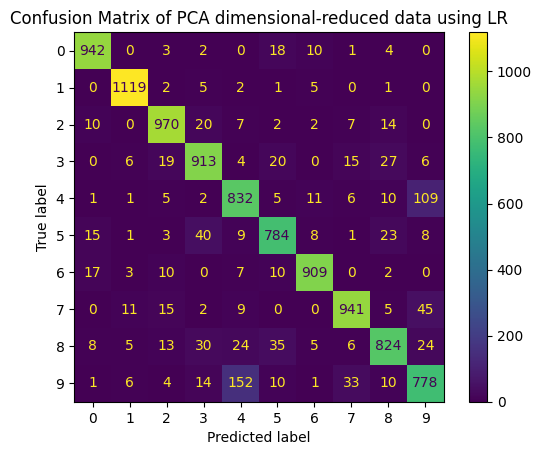

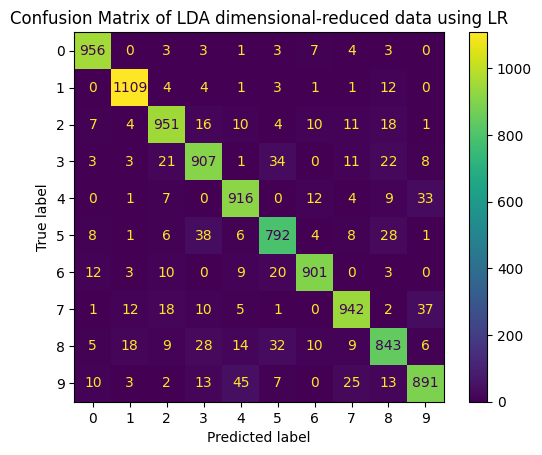

In [46]:
# How does SVM compare to PCA and LDA (compare confusion matrices)
predict_pca = svm_pca.predict(pca_transform_test)
predict_lda = svm_lda.predict(lda_transform_test)
cm_svm_pca = confusion_matrix(test_targets, predict_pca)
cm_svm_lda = confusion_matrix(test_targets, predict_lda)

# Accuracy of PCA/LDA
accuracy_pca = accuracy_score(test_targets,predict_pca)
accuracy_lda = accuracy_score(test_targets,predict_lda)
score_pca = svm_pca.score(pca_transform_test,test_targets)
score_lda = svm_lda.score(lda_transform_test,test_targets)

print(f"Prediction PCA: {predict_pca}")
print(f"Accuracy PCA: {accuracy_pca:.2f}%")
print(f"Score PCA: {score_pca:.2f}%")
print()
print(f"Prediction LDA: {predict_lda}")
print(f"Accuracy LDA: {accuracy_lda:.2f}%")
print(f"Score LDA: {score_lda:.2f}%")

# Plot confusion matrix
pca_matrix = ConfusionMatrixDisplay(confusion_matrix=cm_svm_pca, display_labels=svm_pca.classes_)
lda_matrix = ConfusionMatrixDisplay(confusion_matrix=cm_svm_lda, display_labels=svm_lda.classes_)
pca_matrix.plot()
plt.title("Confusion Matrix of PCA dimensional-reduced data using SVM")
lda_matrix.plot()
plt.title("Confusion Matrix of LDA dimensional-reduced data using SVM")
plt.show()